<a href="https://colab.research.google.com/github/thiagocdn/US_Elections/blob/main/US_Electoral_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [151]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [152]:
dataset = pd.read_csv('https://raw.githubusercontent.com/thiagocdn/US_Elections/main/dataset.csv')
dataset.head()

,state_name,state_initials,population_2004,electoral_votes_2004
0,Alabama,AL,4530182,9
1,Alaska,AK,655435,3
2,Arizona,AZ,5743834,10
3,Arkansas,AR,2752629,6
4,California,CA,35893799,55


In [153]:
dataset["relation_pop_elec"] = dataset["electoral_votes_2004"] / dataset["population_2004"]
dataset.head()

,state_name,state_initials,population_2004,electoral_votes_2004,relation_pop_elec
0,Alabama,AL,4530182,9,0.000002
1,Alaska,AK,655435,3,0.000005
2,Arizona,AZ,5743834,10,0.000002
3,Arkansas,AR,2752629,6,0.000002
4,California,CA,35893799,55,0.000002


In [154]:
dataset.set_index('state_name', inplace=True)
dataset.head()

,state_initials,population_2004,electoral_votes_2004,relation_pop_elec
state_name,,,,
Alabama,AL,4530182,9,0.000002
Alaska,AK,655435,3,0.000005
Arizona,AZ,5743834,10,0.000002
Arkansas,AR,2752629,6,0.000002
California,CA,35893799,55,0.000002


<Figure size 432x288 with 0 Axes>

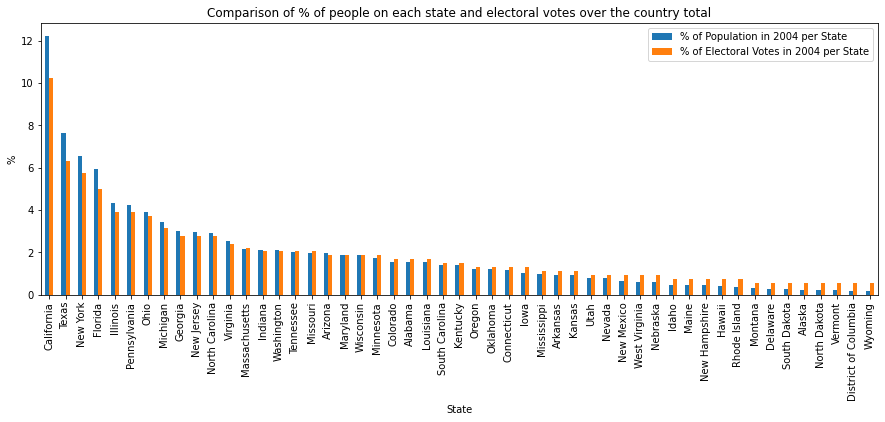

In [155]:
plt.figure()
ploting_set = dataset.copy()
ploting_set["population_2004"] = ploting_set["population_2004"]/dataset["population_2004"].sum()*100
ploting_set["electoral_votes_2004"] = ploting_set["electoral_votes_2004"]/dataset["electoral_votes_2004"].sum()*100
ploting_set[["population_2004", "electoral_votes_2004"]].sort_values("population_2004", ascending=False).plot(kind="bar", figsize=(15,5))

plt.legend(["% of Population in 2004 per State", "% of Electoral Votes in 2004 per State"])
plt.xlabel('State')
plt.ylabel('%')
plt.title('Comparison of % of people on each state and electoral votes over the country total')
plt.show()

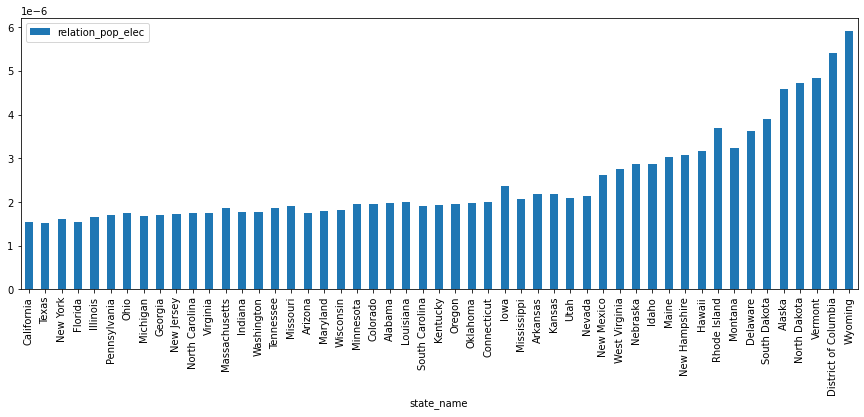

In [156]:
sorted_ploting_set = ploting_set.sort_values("population_2004", ascending=False)
sorted_ploting_set[["relation_pop_elec"]].plot(kind="bar", figsize=(15,5))

Now, we have the states which most influence on electoral votes with less single votes in the election, lets split them and check the minimum quantity of votes candidate A needs to be elected.

In [157]:
sorted_relation = dataset.sort_values("relation_pop_elec", ascending=False)

In [158]:
votes_candidate_A = 0
electoral_votes_A = 0
votes_candidate_B = 0
electoral_votes_B = 0

for state in sorted_relation.iloc:
  if(electoral_votes_A < 270):
    votes_candidate_A = votes_candidate_A + (state.population_2004)*0.5 + 1
    electoral_votes_A = electoral_votes_A + state.electoral_votes_2004
    votes_candidate_B = votes_candidate_B + (state.population_2004)*0.5 - 1
  else:
    votes_candidate_B = votes_candidate_B + state.population_2004
    electoral_votes_B = electoral_votes_B + state.electoral_votes_2004

In [159]:
print(f"Electoral Votes Cadidate A: {electoral_votes_A}")
print(f"Electoral Votes Cadidate B: {electoral_votes_B}")

Electoral Votes Cadidate A: 279
Electoral Votes Cadidate B: 259


## **WINNER:** *Candidate A* with 279 electoral votes...

... but lets check the abosulte number of votes:

In [160]:
print(f"Absolute Votes Cadidate A: {votes_candidate_A}")
print(f"Absolute Votes Cadidate B: {votes_candidate_B}")
print("")
print(f"Difference: {votes_candidate_B - votes_candidate_A}")

Absolute Votes Cadidate A: 66341472.5
Absolute Votes Cadidate B: 227313931.5

Difference: 160972459.0


Even though the **Candidate A** was the winner, we can check an astounishing number of over 

## **160 MILLIONS more votes for candidate B**

checking the % of votes for each candidate:

In [161]:
print(f"% of Votes for Cadidate A: {votes_candidate_A / (votes_candidate_A + votes_candidate_B)*100:.2f}%")
print(f"% of Votes for Cadidate B: {votes_candidate_B / (votes_candidate_A + votes_candidate_B)*100:.2f}%")

% of Votes for Cadidate A: 22.59%
% of Votes for Cadidate B: 77.41%
